### Dependencies

In [1]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

Using TensorFlow backend.


### Import and Shape Data

In [2]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
# Working with 'letters'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

In [4]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


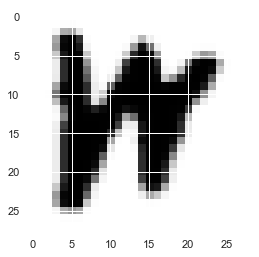

In [5]:
# Plot an image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys)

In [6]:
# Flatten Data
dims = images_train.shape[1] * images_train.shape[2]
X_train = images_train.reshape(images_train.shape[0], dims)
X_test = images_test.reshape(images_test.shape[0], dims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (124800, 784)
Testing Shape: (20800, 784)


In [7]:
# Rescale to 0 -> 1 by dividing by max pixel value (255)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
# One-Hot Encoding

from keras.utils import np_utils # used to convert array of labeled data to one-hot vector
# should be 26 but out of index?
# Effects accuracy as have a class where their will be no results
num_classes = 27
y_train = np_utils.to_categorical(labels_train, num_classes)
y_test = np_utils.to_categorical(labels_test, num_classes)

### Create and Evaluate Model

In [9]:
# Empty Sequential model
from tensorflow.keras.models import Sequential
model = Sequential()

#Layers

# 1 - number of elements (pixels) in each image
# Dense layer - when every node from previous layer is connected to each node in current layer
model.add(Dense(500, activation='relu'))

# Second Hidden Layer
model.add(Dense(500, activation='relu'))

# Output Layer - number of nodes corresponds to number of y labels
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])

In [11]:
# Train Model
model.fit(X_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
124800/124800 - 18s - loss: 0.5792 - acc: 0.8217
Epoch 2/10
124800/124800 - 18s - loss: 0.2944 - acc: 0.9040
Epoch 3/10
124800/124800 - 18s - loss: 0.2363 - acc: 0.9214
Epoch 4/10
124800/124800 - 18s - loss: 0.2027 - acc: 0.9314
Epoch 5/10
124800/124800 - 20s - loss: 0.1829 - acc: 0.9370
Epoch 6/10
124800/124800 - 19s - loss: 0.1666 - acc: 0.9425
Epoch 7/10
124800/124800 - 18s - loss: 0.1542 - acc: 0.9460
Epoch 8/10
124800/124800 - 17s - loss: 0.1441 - acc: 0.9490
Epoch 9/10
124800/124800 - 18s - loss: 0.1391 - acc: 0.9505
Epoch 10/10
124800/124800 - 18s - loss: 0.1322 - acc: 0.9529


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  392500    
_________________________________________________________________
dense_1 (Dense)              multiple                  250500    
_________________________________________________________________
dense_2 (Dense)              multiple                  13527     
Total params: 656,527
Trainable params: 656,527
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Save Model
model.save("emnist_trained.h5")

In [14]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("emnist_trained.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
# Evaluate Model
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

20800/20800 - 3s - loss: 0.4030 - acc: 0.9103
Loss: 0.4030346241740671, Accuracy: 0.9103365540504456


### Predict Model

A: 1, B: 2, C: 3, D: 4, E: 5, F: 6, G: 7, H: 8, I: 9, J: 10, K: 11, L: 12, M: 13, N: 14, O: 15, P: 16, Q: 17, R: 18, S: 19, T: 20, U: 21, V: 22, W: 23, X: 24, Y: 25, Z: 26

In [16]:
test = np.expand_dims(X_train[8], axis=0)
test.shape

(1, 784)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

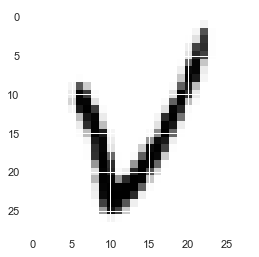

In [18]:
plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [19]:
model.predict(test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model.predict_classes(test)

array([22], dtype=int64)

In [21]:
test = np.expand_dims(X_train[22], axis=0)
test.shape

(1, 784)

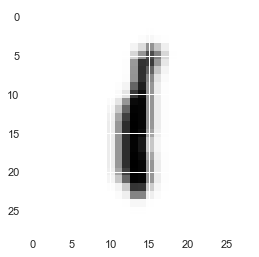

In [22]:
plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [23]:
model.predict(test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
model.predict_classes(test)

array([9], dtype=int64)

### Import Custom Image 

The first test is mainly to see if importing works. I got the "B" (and all the testing letter images) from graphemica.com. 
This site contains larger images of font styles. I thought this affected the learning as the EMNIST set is created from actual writing. 
The first "B" is Times New Roman, and the test resulted in not predicting correctly. The second "B" is DejaVu Sans, Book. This "B" is bolder and more similar to the test data than the Times New Roman "B". This model will most likely work better with bolder images based off these observations. 
Note: These imported images are also NOT handwritten thus affecting conclusions about the model

In [25]:
file = "imageData/images/test2.png"

array([21], dtype=int64)

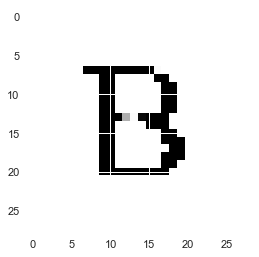

In [26]:
# Convert to numpy array
from tensorflow.keras.preprocessing import image
image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")

#scale and flatten
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img

# Plot and Predict
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)
model.predict_classes(img)

array([2], dtype=int64)

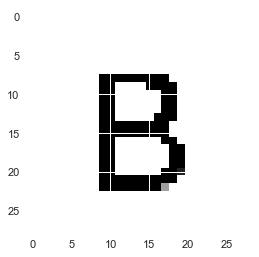

In [27]:
file = "imageData/images/test5.png"

from tensorflow.keras.preprocessing import image
image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")

from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)
model.predict_classes(img)

### Hand-Written Tests

#### Pencil

array([17], dtype=int64)

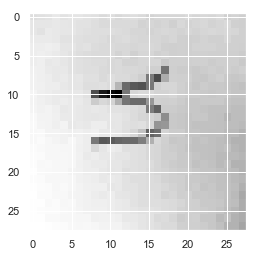

In [30]:
file = "imageData/imPencil/pencil23.jpg"

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

Image is tilted. Will loop through all images in file and rotate using the PILLOW library. The glob library is to help loop through multiple elements in a file.

In [31]:
# For saving flipped image and then testing
import PIL
from PIL import Image
import glob, os

files = glob.glob("imageData/imPencil/*.jpg")

for infile in files:
    image = Image.open(infile)
    im = image.rotate(270)
    im.thumbnail((28,28), Image.ANTIALIAS)
    im.save(infile + '_thumbnail', 'JPEG')

Try test again with flipped file

array([13], dtype=int64)

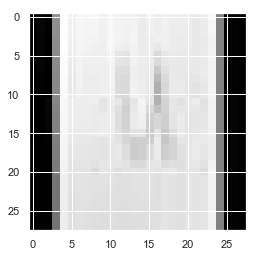

In [32]:
file = "imageData/imPencil/pencil23.jpg_thumbnail"

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

#### Pen

In [33]:
# For saving flipped image and then testing
import PIL
from PIL import Image
import glob, os

files = glob.glob("imageData/imPen/*.jpg")

for infile in files:
    image = Image.open(infile)
    im = image.rotate(270)
    im.thumbnail((28,28), Image.ANTIALIAS)
    im.save(infile + '_thumbnail', 'JPEG')

array([13], dtype=int64)

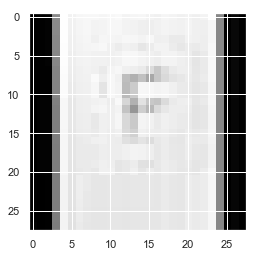

In [34]:
file = "imageData/imPen/pen9.jpg_thumbnail"

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

#### Sharpie

In [35]:
# For saving flipped image and then testing
import PIL
from PIL import Image
import glob, os

files = glob.glob("imageData/imSharpie/*.jpg")

for infile in files:
    image = Image.open(infile)
    im = image.rotate(270)
    im.thumbnail((28,28), Image.ANTIALIAS)
    im.save(infile + '_thumbnail', 'JPEG')

array([23], dtype=int64)

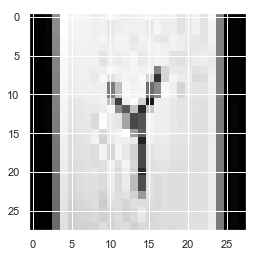

In [36]:
file = "imageData/imSharpie/sharpie11.jpg_thumbnail"

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

#### Marker

In [37]:
# For saving flipped image and then testing
import PIL
from PIL import Image
import glob, os

files = glob.glob("imageData/imMarker/*.jpg")

for infile in files:
    image = Image.open(infile)
    im = image.rotate(270)
    im.thumbnail((28,28), Image.ANTIALIAS)
    im.save(infile + '_thumbnail', 'JPEG')

array([13], dtype=int64)

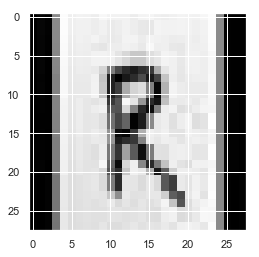

In [38]:
file = "imageData/imMarker/marker15.jpg_thumbnail"

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

### Using OpenCV to read handwritten letters

#### Pen

array([17], dtype=int64)

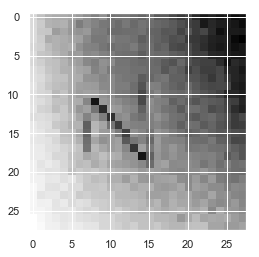

In [45]:
file = 'imageData/newImages/test1.jpg'
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

In [46]:
import PIL
from PIL import Image
import glob, os

files = glob.glob("imageData/newImages/test1.jpg")

for infile in files:
    image = Image.open(infile)
    im = image.rotate(270)
    im.thumbnail((28,28), Image.ANTIALIAS)
    im.save(infile + '_thumbnail', 'JPEG')

array([17], dtype=int64)

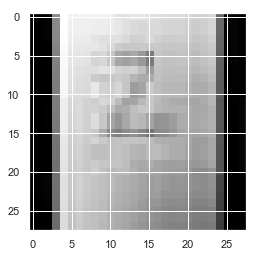

In [47]:
file = 'imageData/newImages/test1.jpg_thumbnail'
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

In [39]:
import cv2
image = cv2.imread('imageData/newImages/test2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28))
# cv2.imshow('gray',gray)
# cv2.waitKey(0)
cv2.imwrite('imageData/newImages/testGray2.jpg', resized)

True

array([17], dtype=int64)

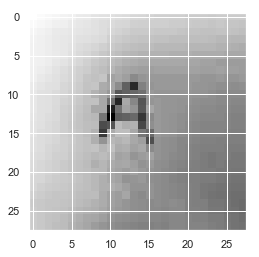

In [40]:
file = 'imageData/newImages/testGray2.jpg'
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

In [41]:
import cv2
image = cv2.imread('imageData/newImages/test3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28))
# cv2.imshow('gray',gray)
# cv2.waitKey(0)
cv2.imwrite('imageData/newImages/testGray3.jpg', resized)

True

array([17], dtype=int64)

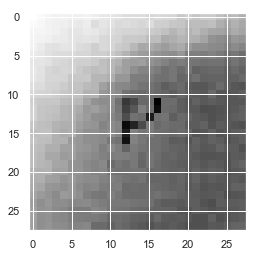

In [42]:
file = 'imageData/newImages/testGray3.jpg'
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)

#### Marker

In [43]:
import cv2
image = cv2.imread('imageData/newImages/test4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28))
# cv2.imshow('gray',gray)
# cv2.waitKey(0)
cv2.imwrite('imageData/newImages/testGray4.jpg', resized)

True

array([23], dtype=int64)

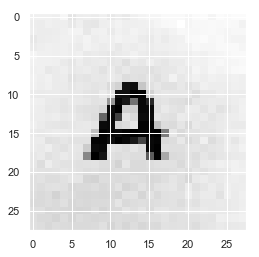

In [44]:
file = 'imageData/newImages/testGray4.jpg'
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

image_size = (28,28)
im = image.load_img(file, target_size=image_size, color_mode="grayscale")


image = img_to_array(im)

image /= 255
img = image.flatten().reshape(-1, 28*28)

img = 1 - img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

model.predict_classes(img)